In [1]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
init_notebook_mode()

In [3]:
data = pd.read_csv("../../cache/track2/tmp/all_data.csv")
test = pd.read_csv("../../cache/track2/tmp/test.csv")

In [7]:
# columns = ["uid", "user_city", "item_id", "author_id", "item_city",
#                "channel", "music_id", "device",  "duration_time", "finish", "like"]
# data = data[columns]
# test = test[columns]

In [4]:
print (data.shape)
print (test.shape)

(19622340, 17)
(2761799, 16)


In [5]:
data.shape[0] / test.shape[0]

7.104912413973645

In [6]:
data.head()

uid  user_city  item_id  author_id  item_city  channel  finish  like  \
0  57384         53    43192     142828          1        0       0     0   
1   3230          6    46822     231026          2        0       1     0   
2   1249        329  1209078     456220          3        0       0     0   
3  11928          9  1209079     456221          4        0       0     0   
4  51266         90  1209080     126416          5        0       1     0   

   music_id  device  create_time  duration_time  fl_00  fl_01  fl_11  fl_10  \
0      4514   34178  53085993699             39      0      0      0      0   
1      5331   24878  53086372896             16      0      0      0      3   
2     39980   14274  53086458433              4      0      0      0      0   
3         0   16649  53086463774              9      0      0      0      0   
4         0   27090  53086432937             19      0      0      0      3   

   target  
0       0  
1       3  
2       0  
3       0  
4       3

In [176]:
data["new_duration"] = data.duration_time * data.finish

Text(0.5,1,"user's duration time")

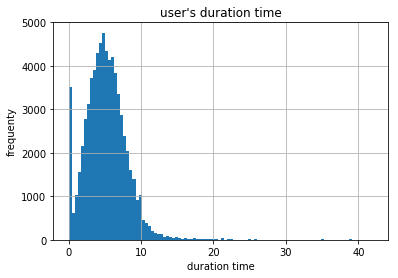

In [184]:
data.groupby("uid")["new_duration"].mean().hist(bins = 100)
plt.xlabel("duration time")
plt.ylabel("frequenty")
plt.title("user's duration time")

In [180]:
np.mean(data.groupby("uid")["new_duration"].mean())

5.154529451733564

Text(0.5,1,"video's duration time")

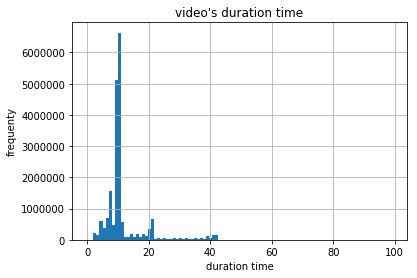

In [185]:
data[data.duration_time < 100].duration_time.hist(bins = 100)
plt.xlabel("duration time")
plt.ylabel("frequenty")
plt.title("video's duration time")

In [186]:
data[data.duration_time < 100].duration_time.mean()

11.154360853695087

In [3]:
0.7* 0.698 + 0.3 * 0.865

0.7481

In [6]:
x=[ "lightgbm", "FM_baseline", 'xDeepFM', 'DeepFM', 'MLP', "NFFM"]

y=[0.68, 0.7481 , 0.77035, 0.768, 0.77, 0.78]

trace1 = go.Scatter(
    x=np.arange(len(x)),
    y=[0.8 for i in range(len(x))],
    mode='lines',
    name = "First place"
)
trace2 = go.Scatter(
    x=np.arange(len(x)),
    y=y,
    mode='lines+text',
    text = x,
    textposition='bottom center',
    name = "Our results"
)
layout = go.Layout(
    title='online result in Leaderboard',
    yaxis=dict(
        title='AUC=0.7*finish_auc + 0.3 * like_auc')
)

fig = go.Figure(data=[trace1,trace2], layout=layout)
iplot(fig)

In [66]:
labels = ["曾经有过finish行为", "没有过finish行为"]
values = [67386, 3325]

trace = go.Pie(labels=labels, values=values)
layout = go.Layout(
    title='是否曾经有过finish行为',
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [69]:
check = data.groupby("uid")["like"].sum().rename("new_like").reset_index()

In [70]:
check.head()

uid  new_like
0    0         0
1    1         3
2    2         0
3    3         6
4    4         3

In [73]:
no_like = data.merge(right=check[check.new_like == 0], on="uid", how="left").fillna(-1)

In [80]:
no_like = no_like[no_like.new_like == 0]

In [83]:
like = data.merge(right=check[check.new_like > 0], on="uid", how="left").fillna(-1)
like = like[like.new_like > 0]

In [84]:
like.head()

uid  user_city  item_id  author_id  item_city  channel  finish  like  \
0   57384         53    43192     142828          1        0       0     0   
1    3230          6    46822     231026          2        0       1     0   
6   12637        266   269351       6757          7        0       1     0   
8    1775         29  1209083       1616          9        0       1     0   
11  17534        124  1209085     456222         12        0       0     0   

    music_id  device  create_time  duration_time  fl_00  fl_01  fl_11  fl_10  \
0       4514   34178  53085993699             39      0      0      0      0   
1       5331   24878  53086372896             16      0      0      0      3   
6          0   27794  53086427987              4      0      0      0      3   
8      14464   30899  53086441559             10      0      0      0      3   
11         0   34312  53086389136             10      0      0      0      0   

    target  new_like  
0        0     542.0  
1        3      20.0  
6        3       3.0  
8        3      10.0  
11       0       5.0

In [92]:
print(no_like.shape)
print(like.shape)

(11899458, 18)
(7722882, 18)


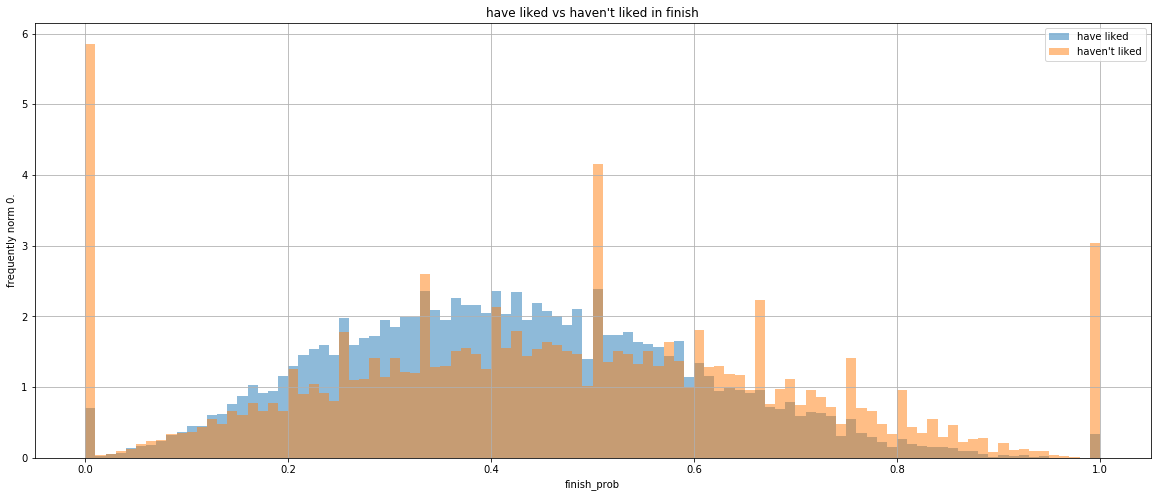

In [91]:
plt.figure(figsize=(20, 8))
like.groupby("uid")["finish"].mean().hist(bins = 100, alpha = 0.5, label = "have liked", normed=True)
no_like.groupby("uid")["finish"].mean().hist(bins = 100, alpha = 0.5, label= "haven't liked", normed=True)
plt.xlabel("finish_prob")
plt.ylabel("frequently norm 0.")
plt.title("have liked vs haven't liked in finish")
plt.legend()

In [97]:
no_like_and_finish = no_like.groupby("uid")["finish"].mean().rename("new_finish").reset_index()

In [99]:
no_like_finish1 = no_like_and_finish[no_like_and_finish.new_finish == 1]
no_like_finish0 = no_like_and_finish[no_like_and_finish.new_finish == 0]

In [107]:
no_like_finish0.columns = ["uid", "new_finish0"]

In [108]:
no_like_finish1_data = data.merge(no_like_finish1, on="uid", how="left").merge(no_like_finish0, on="uid", how="left")


In [111]:
no_like_finish1_data.head()

uid  user_city  item_id  author_id  item_city  channel  finish  like  \
0  57384         53    43192     142828          1        0       0     0   
1   3230          6    46822     231026          2        0       1     0   
2   1249        329  1209078     456220          3        0       0     0   
3  11928          9  1209079     456221          4        0       0     0   
4  51266         90  1209080     126416          5        0       1     0   

   music_id  device  create_time  duration_time  fl_00  fl_01  fl_11  fl_10  \
0      4514   34178  53085993699             39      0      0      0      0   
1      5331   24878  53086372896             16      0      0      0      3   
2     39980   14274  53086458433              4      0      0      0      0   
3         0   16649  53086463774              9      0      0      0      0   
4         0   27090  53086432937             19      0      0      0      3   

   target  new_finish  new_finish0  
0       0         NaN          NaN  
1       3         NaN          NaN  
2       0         NaN          NaN  
3       0         NaN          NaN  
4       3         NaN          NaN

In [117]:
check = no_like_finish1_data[no_like_finish1_data.new_finish0 == 0]

In [121]:
check1 = no_like_finish1_data[no_like_finish1_data.new_finish == 1]

In [133]:


np.mean(no_like_finish1_data[(no_like_finish1_data.new_finish0.isnull()) & (no_like_finish1_data.new_finish.isnull()) ].groupby("uid")["item_id"].count())



297.8641763383363

In [129]:
np.mean(check1.groupby("uid")["item_id"].count())

2.8854916067146283

In [130]:
np.mean(check.groupby("uid")["item_id"].count())

3.0245723172628303

In [134]:
np.mean(data.groupby("uid")["item_id"].count())

277.5005303276718

In [140]:
check = data.groupby("uid")["item_id"].count().rename("video_views").reset_index()

In [168]:
check.video_views.quantile(0.10)

5.0

In [171]:
np.mean(check[(check.video_views.quantile(0.05) < check.video_views) & (check.video_views < check.video_views.quantile(0.95)) ])

uid            35218.851380
video_views      207.333312
dtype: float64

Text(0.5,1,'video_view_times distribution')

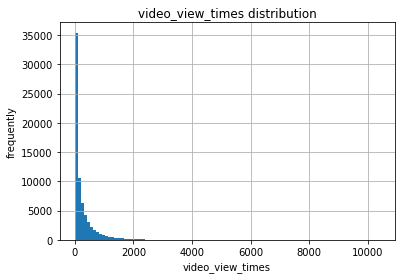

In [173]:
check.video_views.hist(bins=100)
plt.xlabel("video_view_times")
plt.ylabel("frequently")
plt.title("video_view_times distribution")

In [143]:
check.describe()

uid   video_views
count  70711.000000  70711.000000
mean   35355.000000    277.500530
std    20412.651779    469.486085
min        0.000000      1.000000
25%    17677.500000     24.000000
50%    35355.000000    104.000000
75%    53032.500000    329.000000
max    70710.000000  10389.000000

## 查看数据是否是按照顺序排列的？

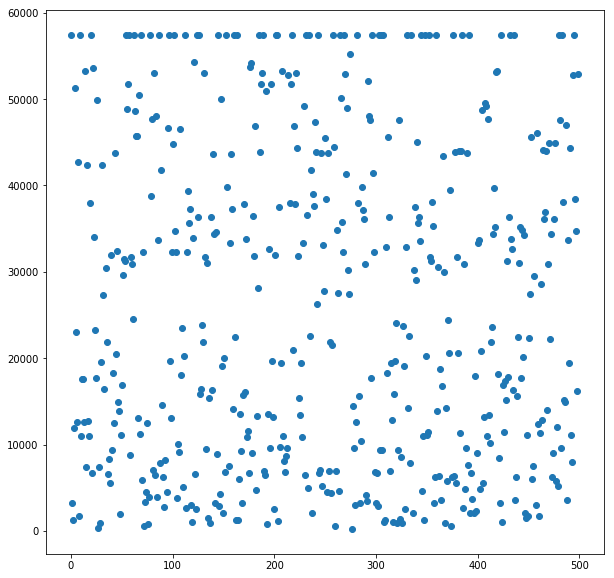

In [17]:
plt.figure(figsize=(10, 10))
plt.scatter(np.arange(data.shape[0])[:500], data.uid.values[:500])


In [21]:
trace = go.Scatter(
    x = np.arange(data.shape[0])[:500],
    y = data.uid.values[:500],
    mode = "markers"
)
trace_data = [trace]
iplot(trace_data)

直观看起来，数据数据是被完全打乱的，随机选取uid来考察

In [24]:
num = data.groupby("uid").count()

In [28]:
num.sort_values(by="finish", ascending=False).head()

user_city  item_id  author_id  item_city  channel  music_id  device  \
uid                                                                          
30679      10389    10389      10389      10389    10389     10389   10389   
11356       9523     9523       9523       9523     9523      9523    9523   
626         8005     8005       8005       8005     8005      8005    8005   
2603        7779     7779       7779       7779     7779      7779    7779   
30691       7463     7463       7463       7463     7463      7463    7463   

       duration_time  finish   like  
uid                                  
30679          10389   10389  10389  
11356           9523    9523   9523  
626             8005    8005   8005  
2603            7779    7779   7779  
30691           7463    7463   7463

In [30]:
data[data.uid == 30679].head()

uid  user_city  item_id  author_id  item_city  channel  music_id  \
2336   30679        170  1210163     156168         53        0       781   
9856   30679        170    20225        562        135        0       238   
12260  30679        170  1214358     218978        134        0         0   
22486  30679        170  1218510     457843          2        0       250   
25817  30679        170  1219759     121940         81        0       400   

       device  duration_time  finish  like  
2336     5642              6       0     0  
9856     5642              8       0     0  
12260    5642             10       0     0  
22486    5642              9       0     0  
25817    5642              7       0     0

通过观察index分布，数据是被完全shuffle的

# 在train部分出现的数据id在test的占比

In [9]:
for c in columns[: -2]:
    all_id = set(data[c])
    test_id = set(test[c])
    print ("train_data: ", c, "num: ", len(all_id))
    print ("test_data: ", c, "num: ", len(test_id))
    print ("train in test: ", c, "prob: ", len(all_id & test_id) / len(test_id))
    print ("-----------")
    print ()

train_data:  uid num:  70711
test_data:  uid num:  32615
train in test:  uid prob:  0.8999540088916143
-----------

train_data:  user_city num:  396
test_data:  user_city num:  374
train in test:  user_city prob:  1.0
-----------

train_data:  item_id num:  3687156
test_data:  item_id num:  790304
train in test:  item_id prob:  0.4490132910879864
-----------

train_data:  author_id num:  778113
test_data:  author_id num:  255537
train in test:  author_id prob:  0.7175125324317027
-----------

train_data:  item_city num:  456
test_data:  item_city num:  402
train in test:  item_city prob:  0.9875621890547264
-----------

train_data:  channel num:  5
test_data:  channel num:  5
train in test:  channel prob:  1.0
-----------

train_data:  music_id num:  82841
test_data:  music_id num:  36286
train in test:  music_id prob:  0.8087967811277077
-----------

train_data:  device num:  71681
test_data:  device num:  32853
train in test:  device prob:  0.8963869357440721
-----------

train_data:

# finish和like转化率

Text(0,0.5,'count')

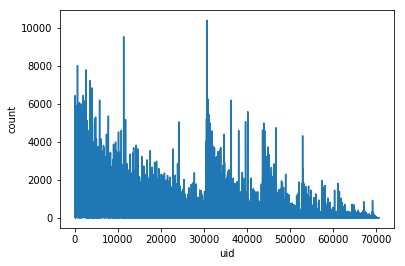

In [18]:
data.groupby("uid")["finish"].count().plot()
plt.ylabel("count")

有个用户看了1w个视频，我们看一下这个值是不是正常的

Text(0.5,0,'video_views')

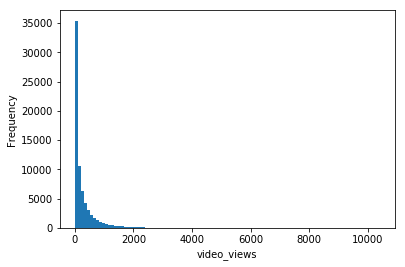

In [21]:
data.groupby("uid")["finish"].count().plot(kind="hist", bins= 100)
plt.xlabel("video_views")

是异常值，但是树模型会自己处理，所以我们不用做处理，接下来我们看一下转化率

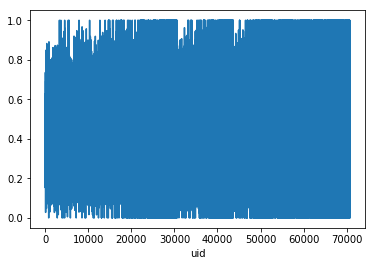

In [22]:
data.groupby("uid")["finish"].mean().plot()

每个uid的finish基本100%，好像实际不是这样，我们hist一下

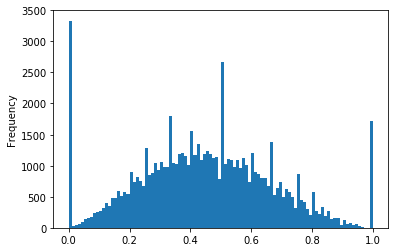

In [24]:
data.groupby("uid")["finish"].mean().plot(kind="hist", bins= 100)

基本呈正太分布，但是有部分异常值，估计是强特

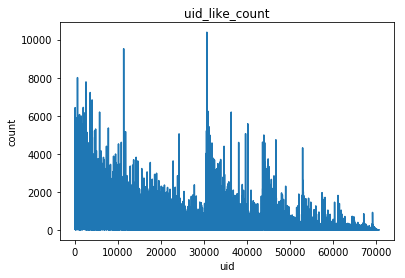

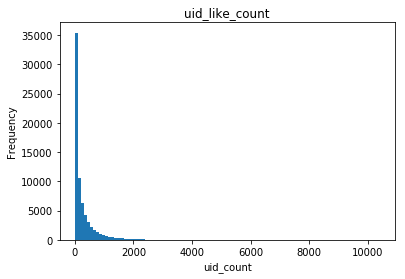

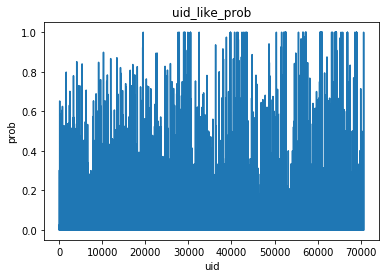

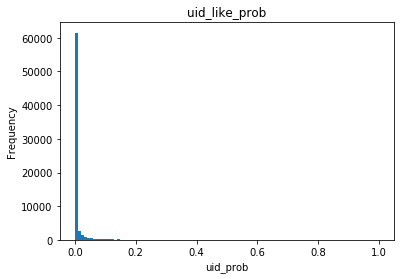

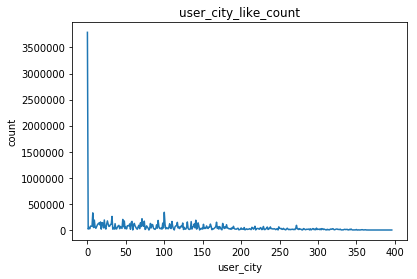

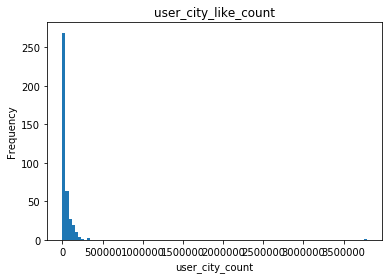

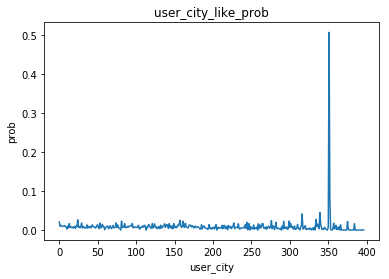

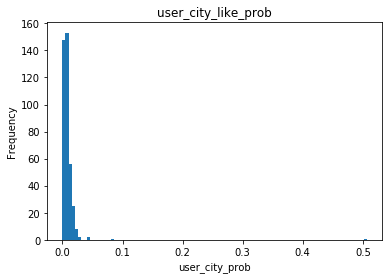

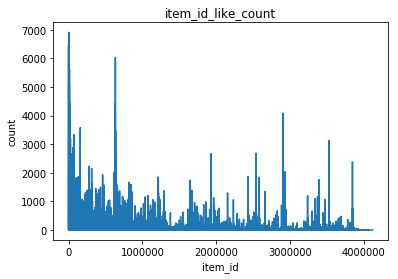

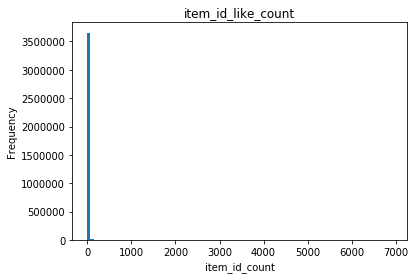

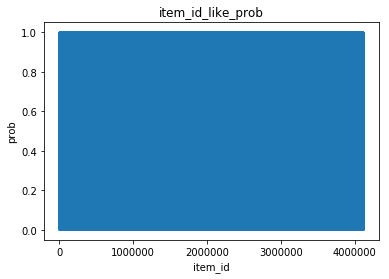

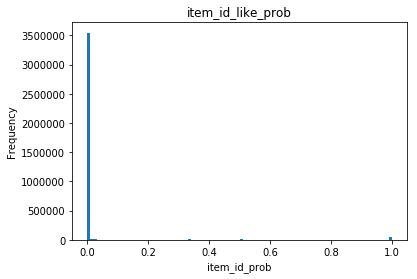

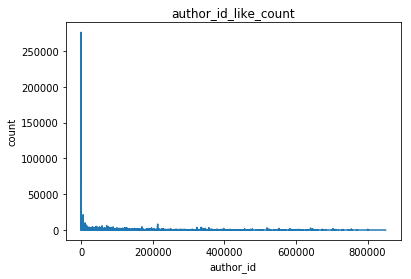

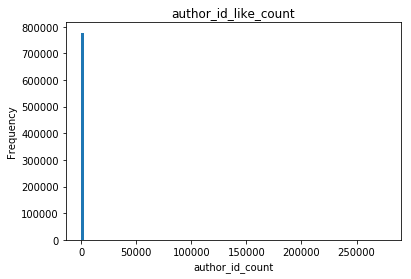

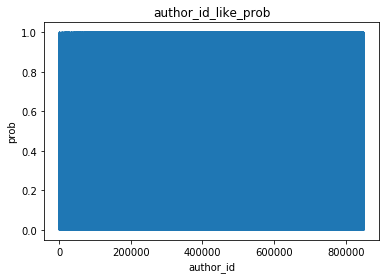

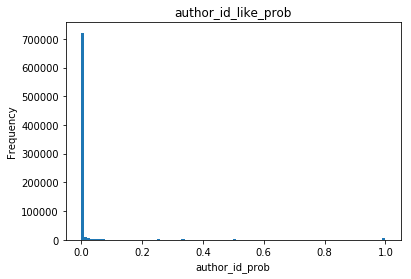

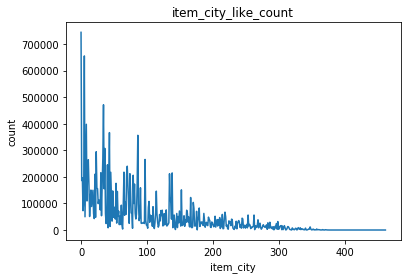

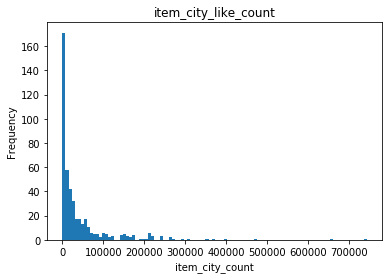

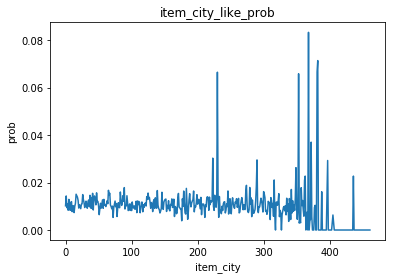

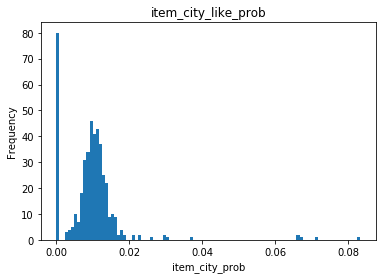

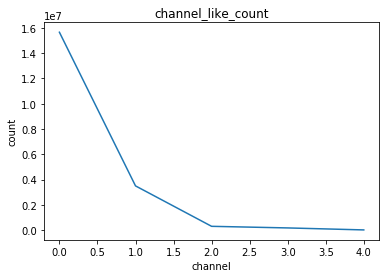

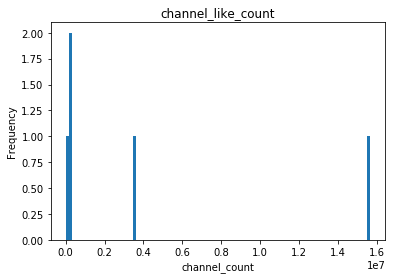

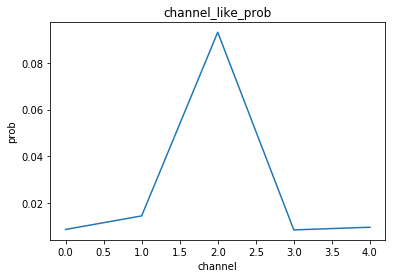

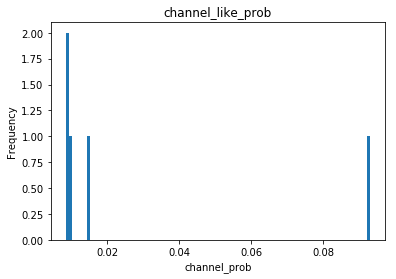

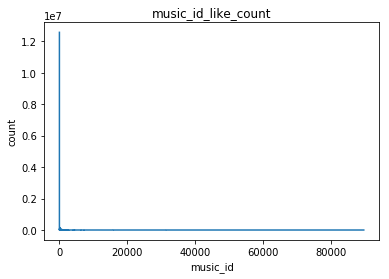

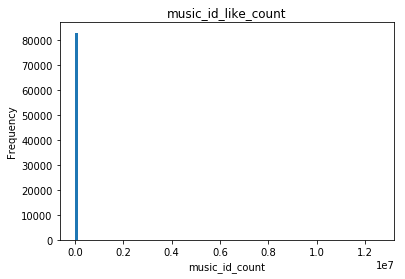

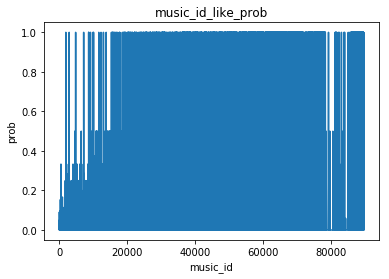

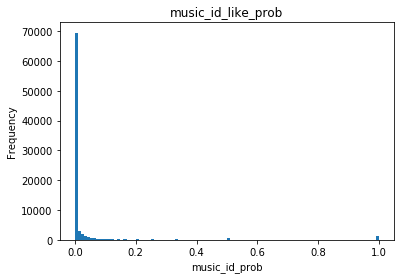

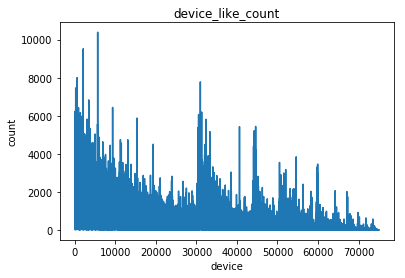

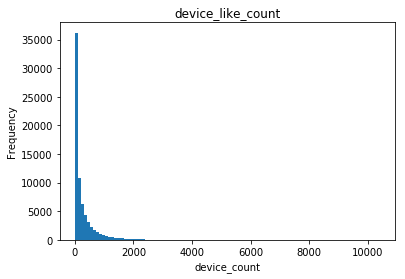

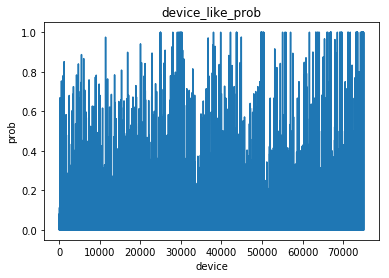

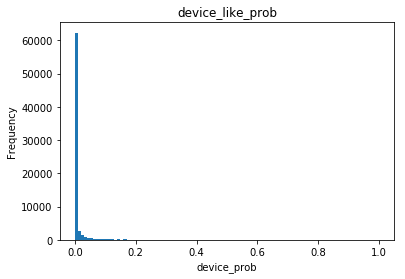

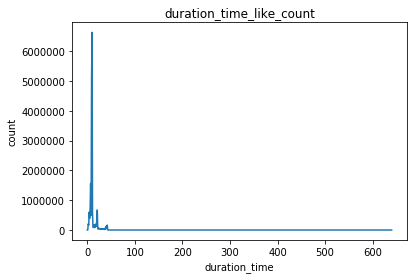

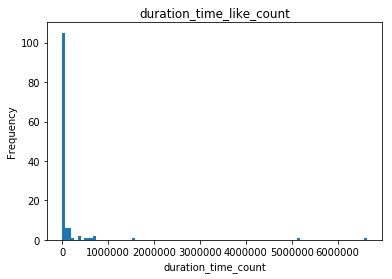

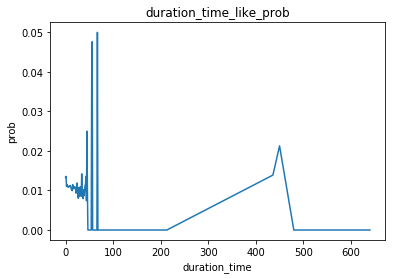

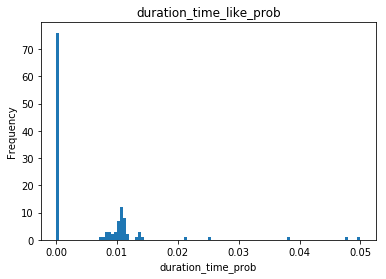

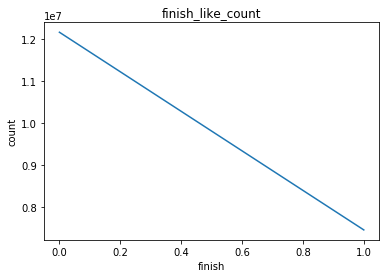

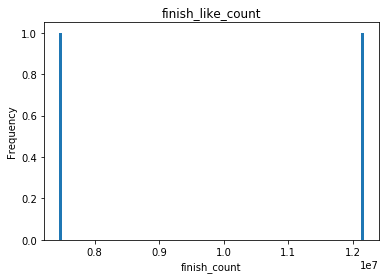

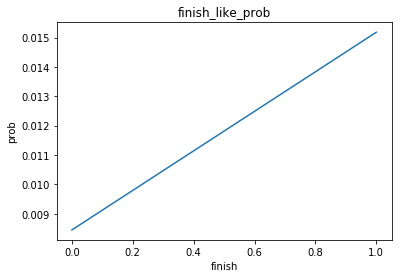

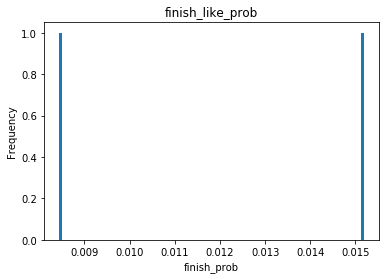

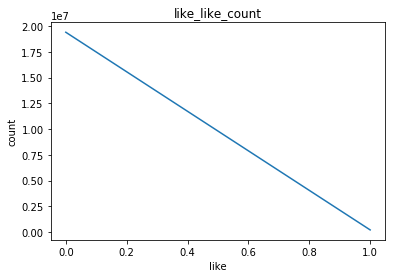

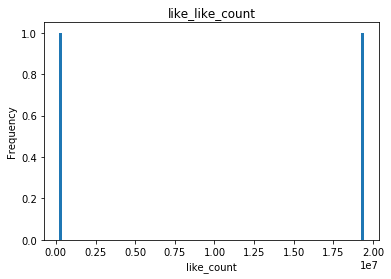

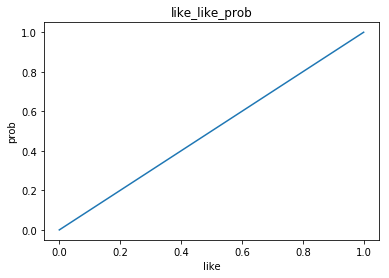

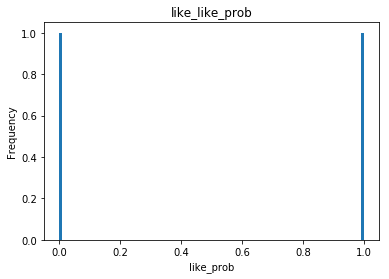

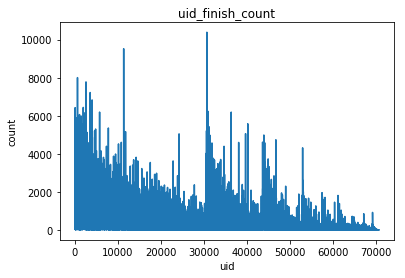

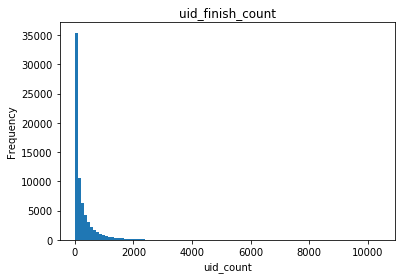

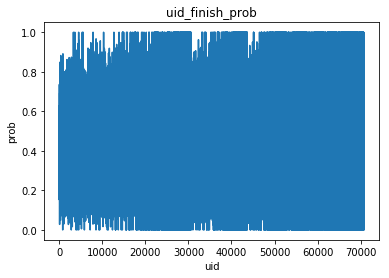

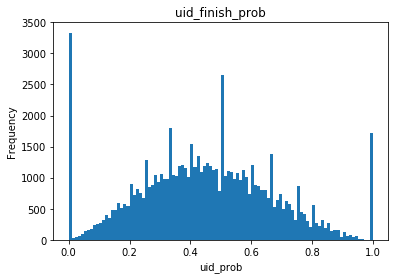

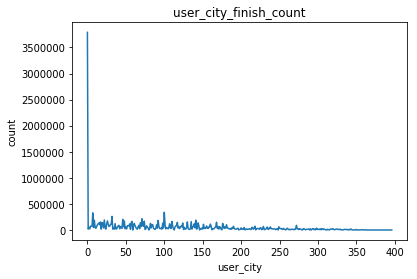

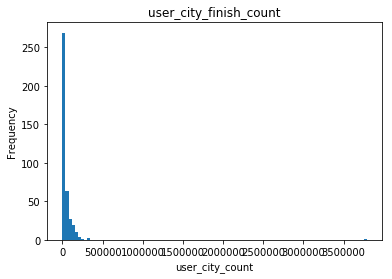

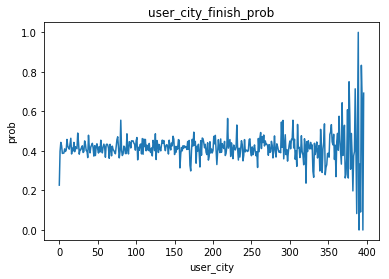

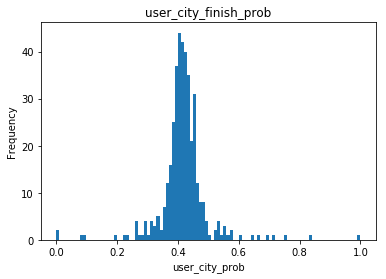

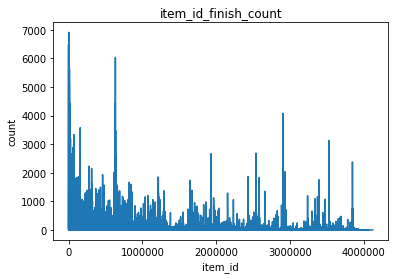

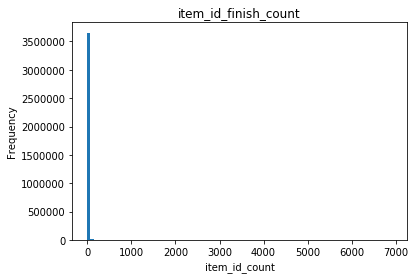

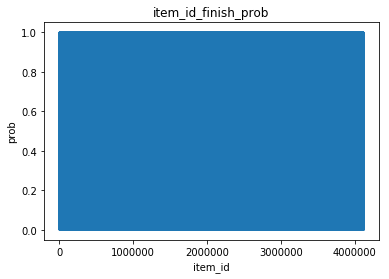

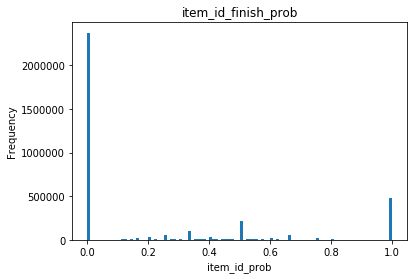

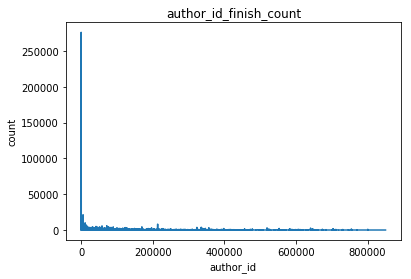

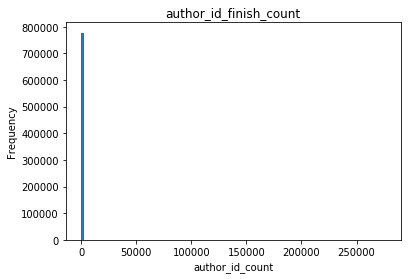

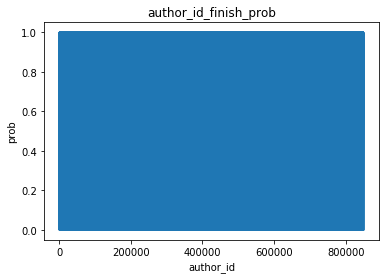

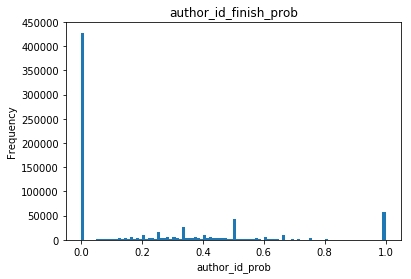

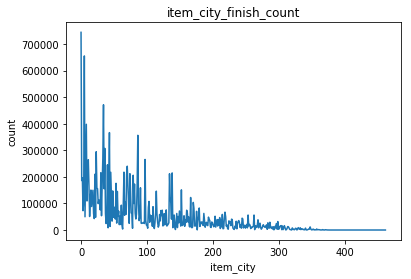

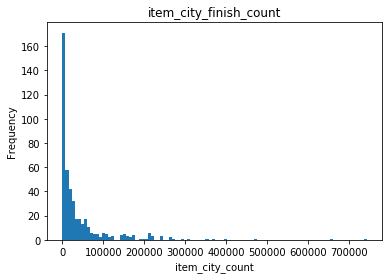

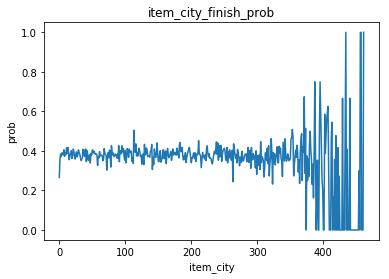

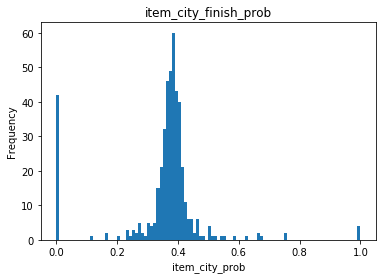

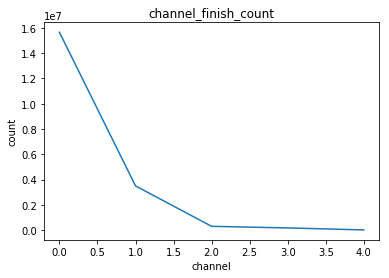

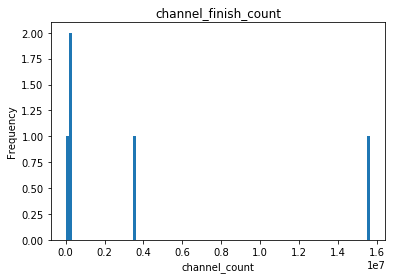

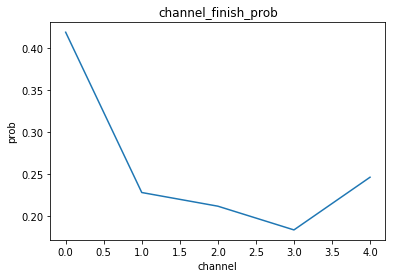

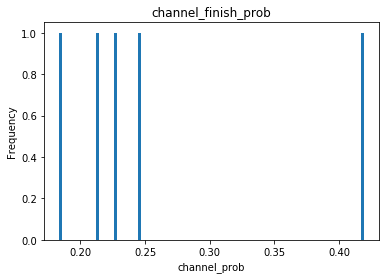

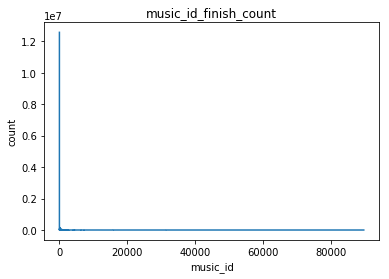

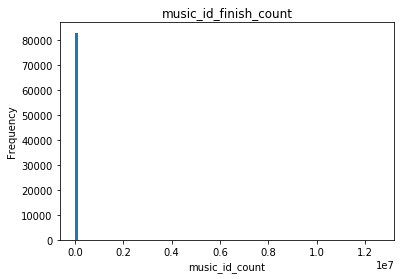

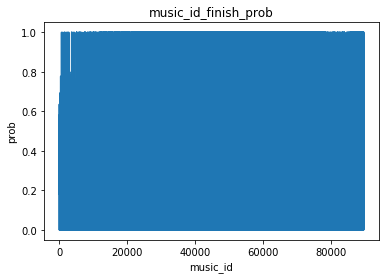

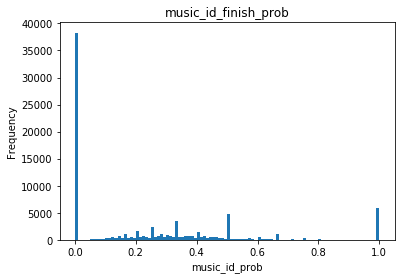

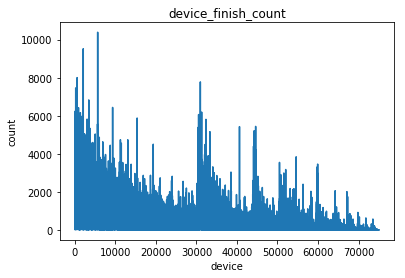

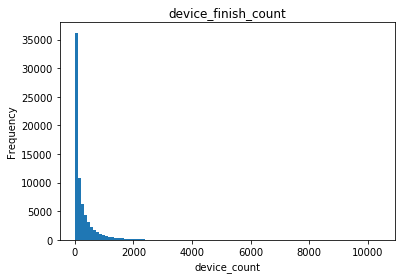

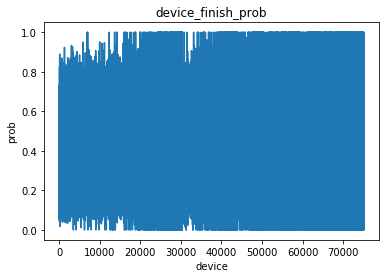

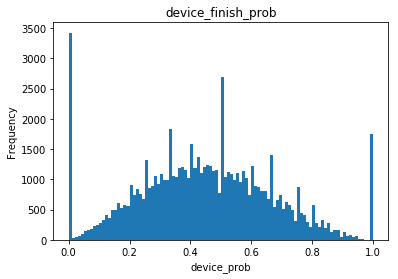

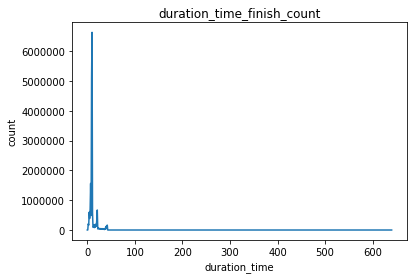

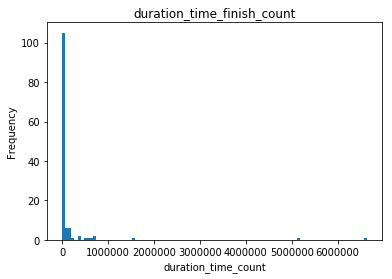

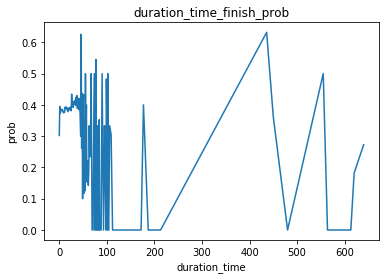

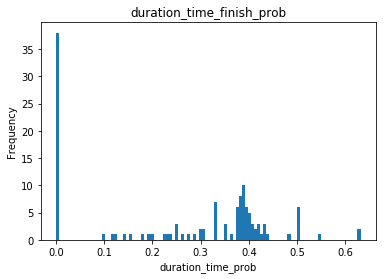

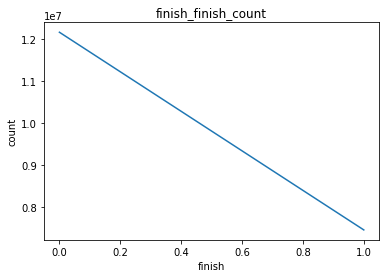

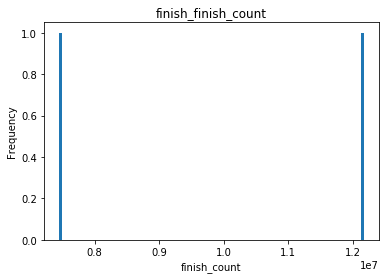

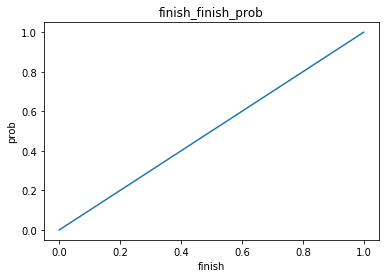

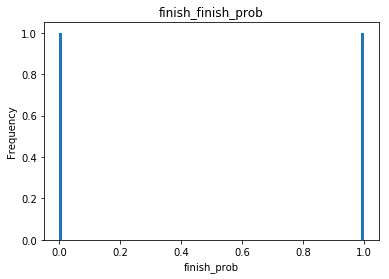

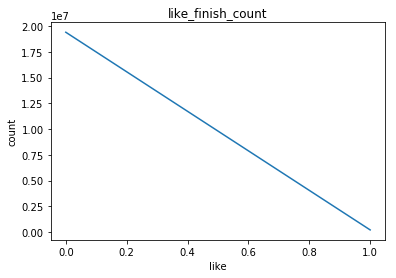

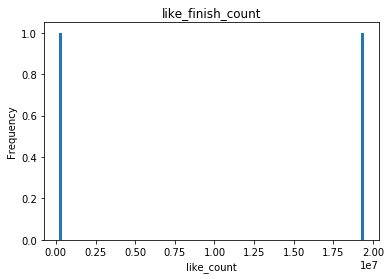

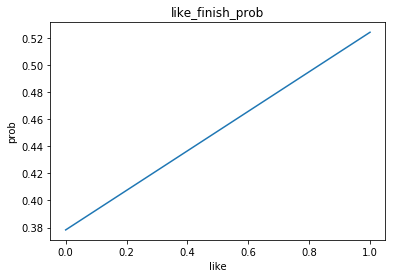

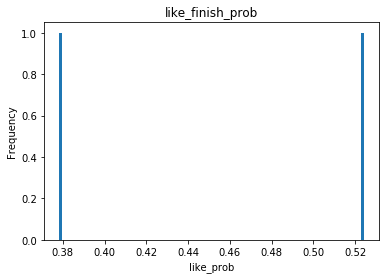

In [28]:
# 看各个特征的分布 in train
for label in ["like", "finish"]:
    for c in columns:
        data.groupby(c)[label].count().plot()
        plt.ylabel("count")
        plt.title(c+"_"+label+"_count")
        plt.show()
        
        data.groupby(c)[label].count().plot(kind="hist", bins= 100)
        plt.xlabel(c+"_count")
        plt.title(c+"_"+label+"_count")
        plt.show()
        
        data.groupby(c)[label].mean().plot()
        plt.ylabel("prob")
        plt.title(c+"_"+label+"_prob")
        plt.show()
        
        data.groupby(c)[label].mean().plot(kind="hist", bins= 100)
        plt.xlabel(c+"_prob")
        plt.title(c+"_"+label+"_prob")
        plt.show()



- user_like_count_hist: 有接近一半的用户，只看了一个短视频就不看了，根据uid的分布来看，有点奇怪（check&&&&）

- user_like_prob_hist: 有6/7的用户不会like（like还是挺多的），也有user like视频的概率为100%，user_id估计是一个强特征。

- user_city_like_count: 有97%以上的用户没有user_city(用0替换了) (check&&)

- user_city_like_count_hist: 可以看到异常值还是挺少的，只有一两个把（id = 0 value = 350w），其他有具体清晰的user_city提供的样本数量也不多，特征的信息比较少

- user_city_like_prob: id为350是一个强特征

- user_city_like_prob_hist: 但是这个样本还是比较少的

- item_id_like_count: 基本上都非常合理， 一个视频看7000次，可以接受

- item_id_like_count: 这个信息很重要，视频被看一次的占97%，这样的话，对视频本身属性的挖掘非常重要。

- item_id_like_prob & item_id_like_prob_hist: 这个图可以看出来，一些item_id总是被别人like的（check&&&在test上的覆盖率，本身的次数，强特征），但是绝大部分还是不被like的。

- author_id：缺失值2.5/ 7.也就是说：有大多数的短视频的author是找不到的。author_id数量为1的占了99%吧，也就是说：每个author大概制作1个视频左右，差异性大。prob：也有强特征。

- item_city: 缺失值不多，但是它的分布这么奇怪？城市的id化是根据作品多少来的。count_hist: 分布正常。prob: 有部分强特征，80个city全部为0。。。强特征啊

- channel:好像没啥用。。。（one hot）

- music_id: count：缺失值挺多的（check&&&），music_id有部分强特征（check：musci_id_like = 1的数量在like=1中的占比&&&&）

- device_id：one_hot

- duration_time: one hot

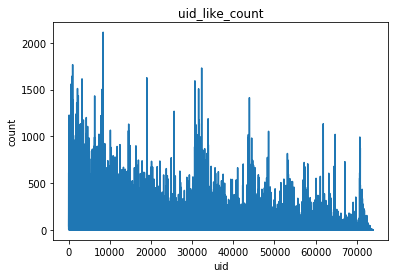

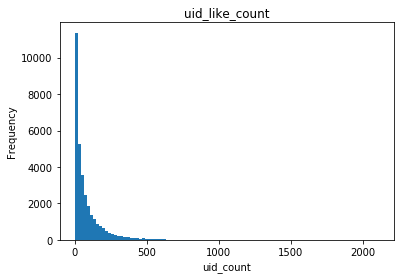

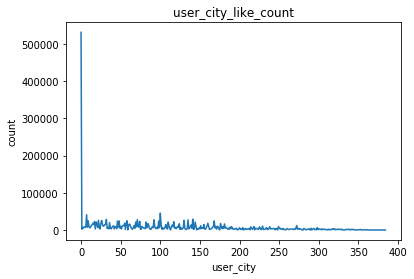

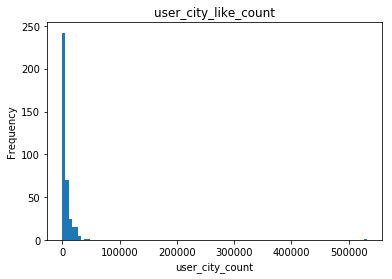

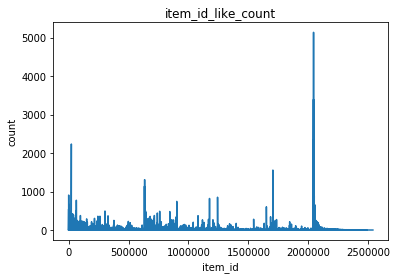

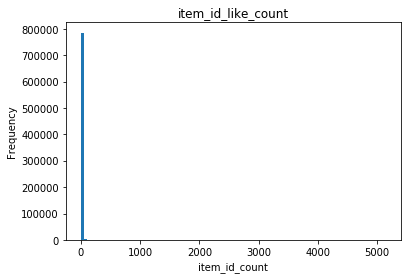

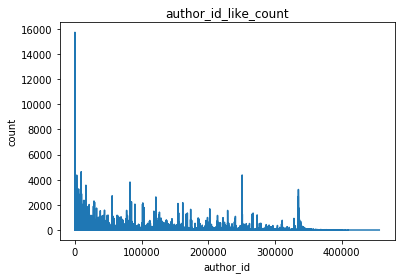

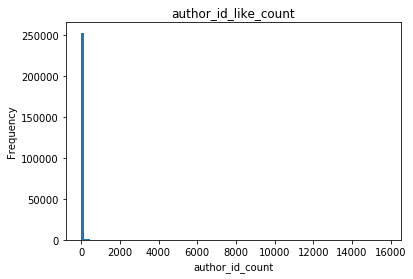

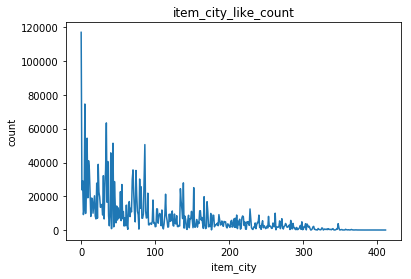

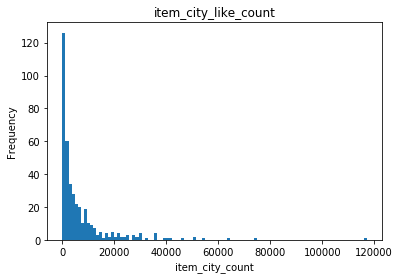

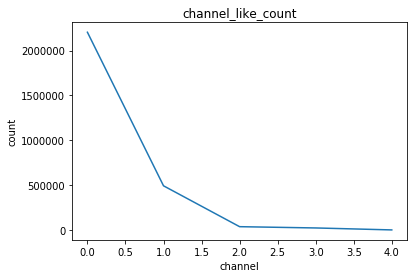

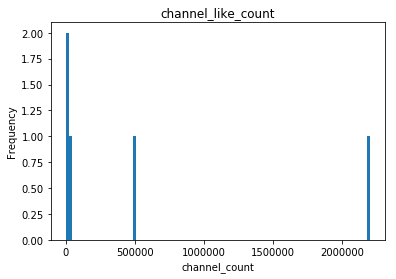

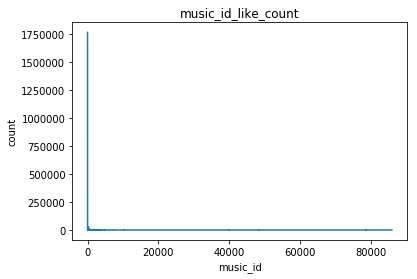

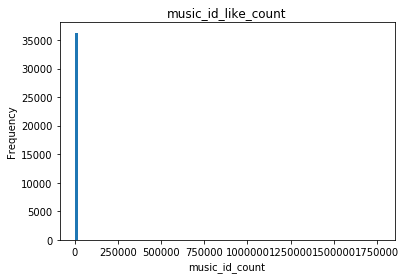

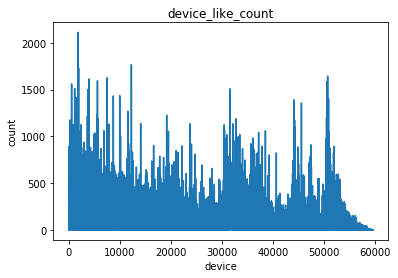

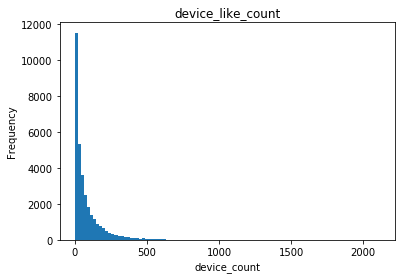

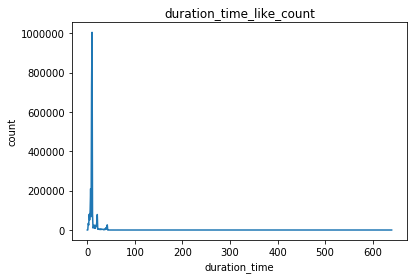

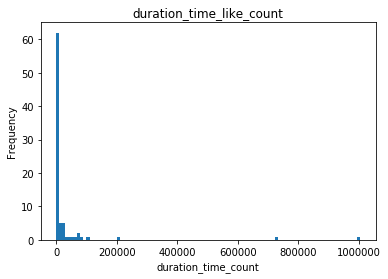

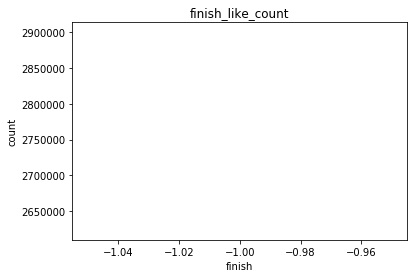

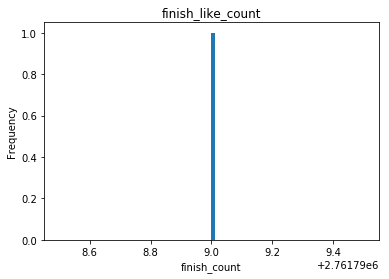

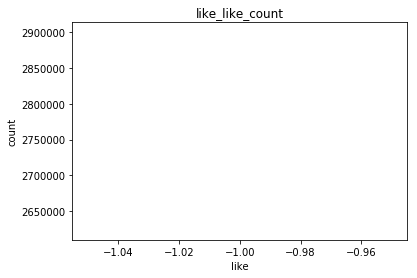

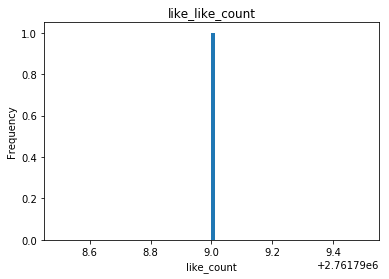

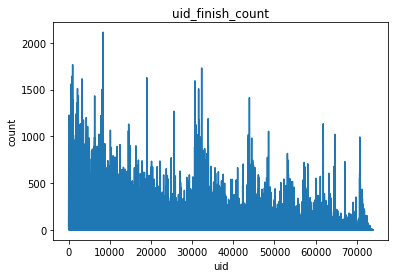

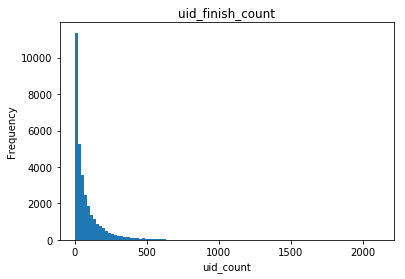

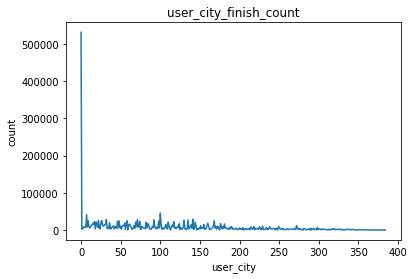

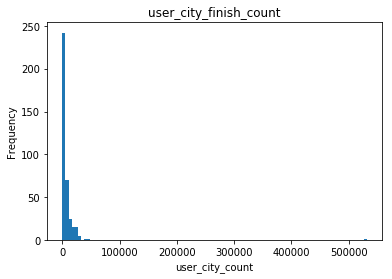

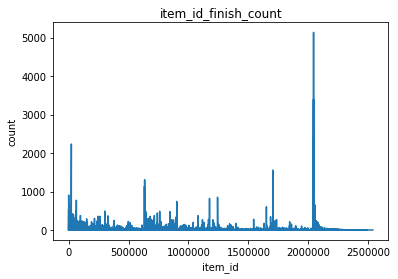

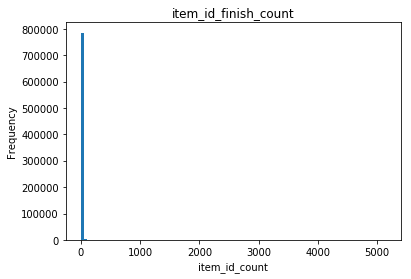

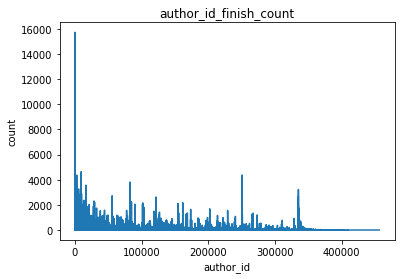

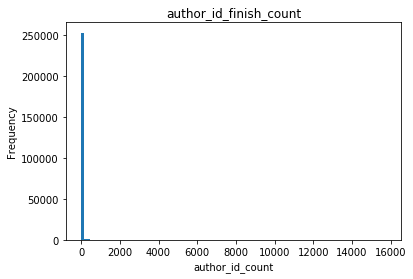

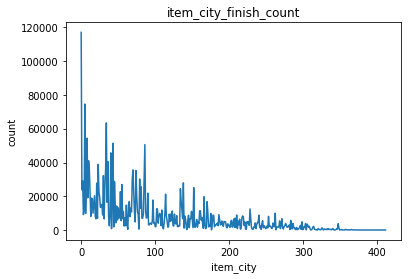

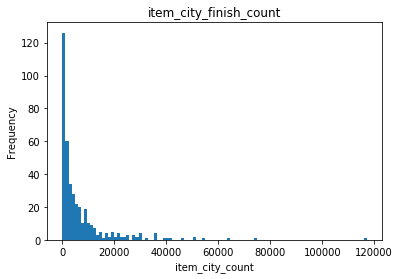

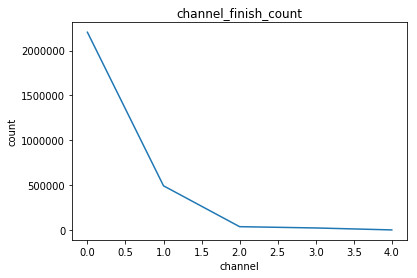

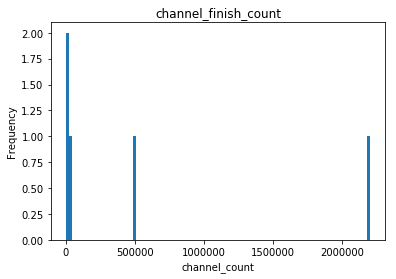

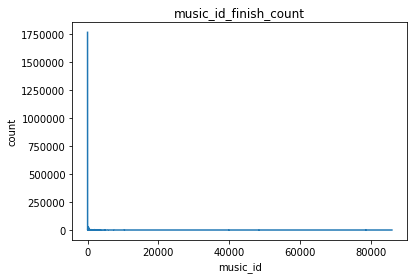

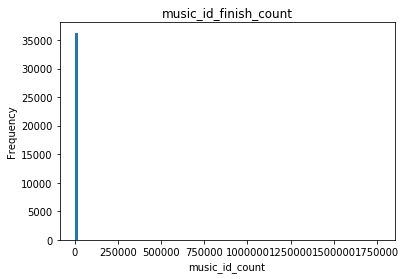

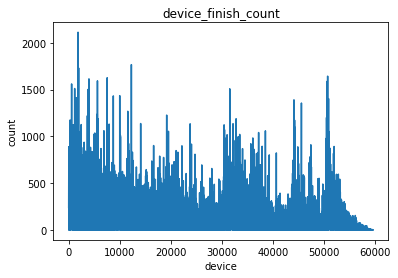

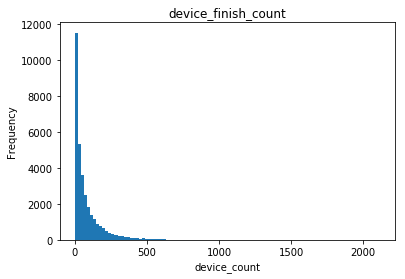

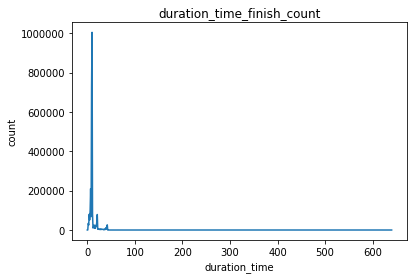

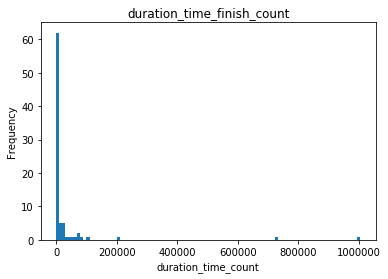

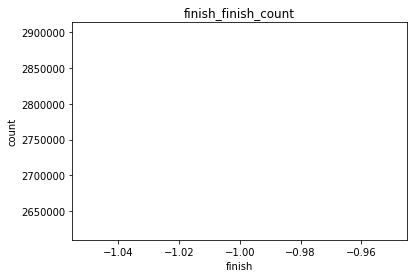

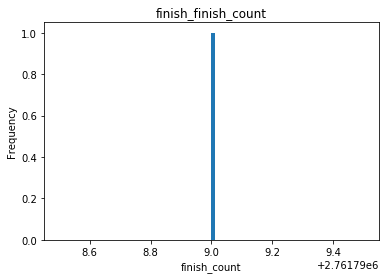

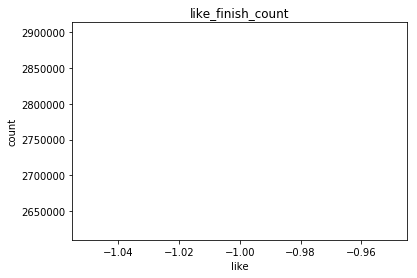

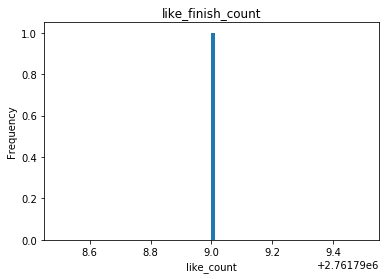

In [31]:
# 看各个特征的分布 in test
for label in ["like", "finish"]:
    for c in columns:
        test.groupby(c)[label].count().plot()
        plt.ylabel("count")
        plt.title(c+"_"+label+"_count")
        plt.show()
        
        test.groupby(c)[label].count().plot(kind="hist", bins= 100)
        plt.xlabel(c+"_count")
        plt.title(c+"_"+label+"_count")
        plt.show()
        

In [32]:
data.head()

uid  user_city  item_id  author_id  item_city  channel  music_id  device  \
0  57384         53    43192     142828          1        0      4514   34178   
1   3230          6    46822     231026          2        0      5331   24878   
2   1249        329  1209078     456220          3        0     39980   14274   
3  11928          9  1209079     456221          4        0         0   16649   
4  51266         90  1209080     126416          5        0         0   27090   

   duration_time  finish  like  
0             39       0     0  
1             16       1     0  
2              4       0     0  
3              9       0     0  
4             19       1     0

Text(0.5,0,'musci_id')

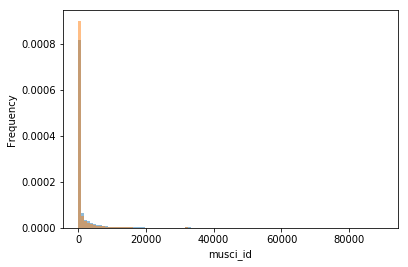

In [50]:
data[data.like == 1]["music_id"].plot("hist", alpha = 0.5, label = "like1", normed=True, bins = 100)
data[data.like == 0]["music_id"].plot("hist", alpha = 0.5, label = "like0", normed=True, bins = 100)
plt.xlabel("musci_id")

## face data

In [14]:
import pandas as pd
import numpy as np

In [3]:
face = pd.read_csv("../../cache/track2/tmp/track2_face_attrs_fill.csv")

In [4]:
face.head()

item_id  male_perc  female_perc  faces  maleBeauty  femaleBeauty  \
0    48318        0.0          0.0    0.0    0.525985      0.534846   
1  1192644        0.0          0.0    0.0    0.525985      0.534846   
2  1329871        1.0          0.0    1.0    0.600000      0.534846   
3   323042        0.0          0.0    0.0    0.525985      0.534846   
4   864967        1.0          0.0    1.0    0.410000      0.534846   

   faceSquare  
0    0.000000  
1    0.000000  
2    0.311805  
3    0.000000  
4    0.004869

In [5]:
face.shape

(4089623, 7)

In [7]:
len(data_item_id & face_item_id) / len(data_item_id)

0.9999056183139525

face的数据在all_data上基本全部都有

In [15]:
np.sum(face.isnull())/face.shape[0]

item_id         0.0
male_perc       0.0
female_perc     0.0
faces           0.0
maleBeauty      0.0
femaleBeauty    0.0
faceSquare      0.0
dtype: float64